Задание 9. Проверка гипотез

Инструкция:

Шаг 1.  Изучите материалы лекционных и практических занятий по темам раздела 5.

Шаг 2. Составьте и проверьте гипотезы о данных по предложенному датасету (Алгоритм выполнения представлен в практическом занятии по теме 5.5).

Шаг 3. Выполните анализ корреляции признаков  (Алгоритм выполнения представлен в практическом занятии по теме 5.5).

Шаг 4. Опубликуйте файл расширения ipynb на платформе Odin.

# Описание данных
Каждый клиент описывается следующим набором признаков:
- `Возраст`, `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Звонки в другие страны`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`, `Дата подключения тарифа`.

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Сформулировать и проверить следующие гипотезы
- клиенты чаще звонят днем или вечером по количеству звонков;
- клиенты чаще звонят днем или (вечером + ночью) по количеству звонков.

**Шаг 3**. Построить матрицу корреляции для всех признаков, кроме `Дата подключения тарифа`.

In [189]:
#  Загрузка библиотек
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import (shapiro, kstest,
                         ks_2samp, anderson,
                         jarque_bera,
                         ttest_ind,
                         mannwhitneyu,
                         kruskal)
from scipy.stats import pearsonr, spearmanr, kendalltau, pointbiserialr

In [190]:
# Шаг 1.загрузка данных
df = pd.read_csv('/content/dataset_telecom.csv')
                #  usecols=['Звонков днем за месяц', 'Звонков вечером за месяц','Звонков ночью за месяц'])
df.head(2)

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа
0,24,NaN,2.4,12.0,65.0,5,0,0,5,56,2018-06-17 12:14:35
1,51,287.51,1.7,111.0,109.0,1,44,0,6,1,2021-10-21 15:39:54


In [191]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   object 
 6   Звонки в другие города                 4492 non-null   object 
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   object 
 9   Количество SMS за месяц                4492 non-null   object 
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

In [193]:
df.columns

Index(['Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие города', 'Звонки в другие страны',
       'Доля звонков на стационарные телефоны', 'Количество SMS за месяц',
       'Дата подключения тарифа'],
      dtype='object')

In [192]:
#делаем замену значений со словарем,тк при построении матрицы корреляции ругается на необработанные данные
dct_replace = {'Звонков ночью за месяц': {"'7'":7},
               'Звонки в другие города': {"'29'":29, "'0'":0},
               'Доля звонков на стационарные телефоны': {"'2'":2},
               'Количество SMS за месяц': {"'12'":12}}

df.replace(dct_replace, inplace=True)

In [194]:
#корректируем типы данных
df = df.astype({'Звонков ночью за месяц': 'float64',
           'Звонки в другие города': 'int64',
           'Доля звонков на стационарные телефоны': 'int64',
           'Количество SMS за месяц': 'int64'},
          errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   float64
 6   Звонки в другие города                 4492 non-null   int64  
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   int64  
 9   Количество SMS за месяц                4492 non-null   int64  
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

In [197]:
#заполняем пропуски
df.fillna({'Звонков днем за месяц': df['Звонков днем за месяц'].median(),
           'Звонков вечером за месяц' : df['Звонков вечером за месяц'].median()},
          inplace=True)

df.isna().sum()

Возраст                                   0
Среднемесячный расход                    24
Средняя продолжительность разговоров     17
Звонков днем за месяц                     0
Звонков вечером за месяц                  0
Звонков ночью за месяц                    0
Звонки в другие города                    0
Звонки в другие страны                    0
Доля звонков на стационарные телефоны     0
Количество SMS за месяц                   0
Дата подключения тарифа                   0
dtype: int64

In [195]:
lts_columns1 = ['Звонков днем за месяц', 'Звонков вечером за месяц','Звонков ночью за месяц']

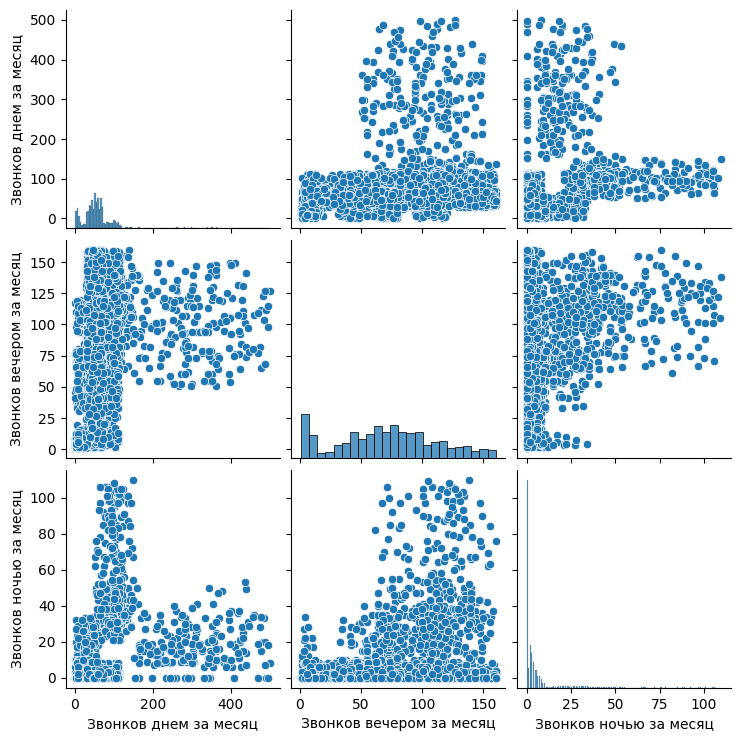

In [196]:
# для предварительного анализа начнем с построения диаграмм рассеивания
sns.pairplot(df[lts_columns1[:3]])
#судя по графику количество звонков было совершено вечером больше чем днем

In [198]:
df['Звонков днем за месяц'].sum()

286818.0

In [199]:
df['Звонков вечером за месяц'].sum()

316076.0

In [200]:
df['Звонков ночью за месяц'].sum()

28179.0

In [201]:
#так как у нас 2 непрерывные интервальные переменные то используем метод Пирсона
df[lts_columns1].corr(method='pearson')
#тк коэффициент корреляции стремится 0,мы видим,что между признаками нет линейной связи

,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц
Звонков днем за месяц,1.000000,0.313295,0.314878
Звонков вечером за месяц,0.313295,1.000000,0.285872
Звонков ночью за месяц,0.314878,0.285872,1.000000


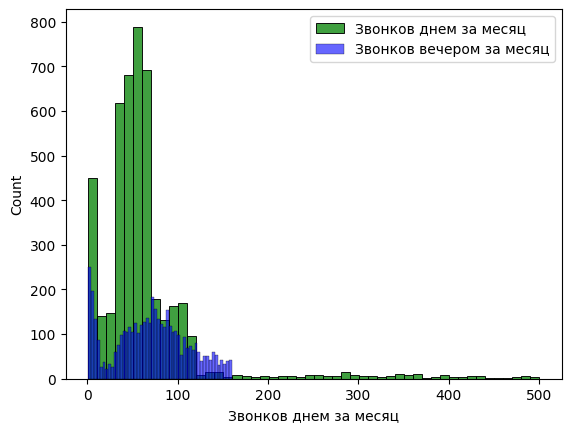

In [202]:
# построим гистограммы и функции плотности для двух признаков 'Звонков днем за месяц' и 'Звонков вечером за месяц'
sns.histplot(data=df,
             x=df['Звонков днем за месяц'],
             color='green',
             label=f'Звонков днем за месяц',
             bins=50)

sns.histplot(data=df,
             x=df['Звонков вечером за месяц'],
             color='blue',
             label=f'Звонков вечером за месяц',
             alpha=0.6,
             bins=50)
plt.legend()

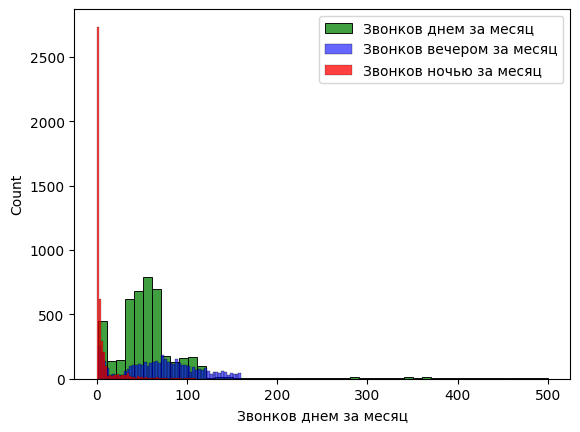

In [203]:
# построим гистограммы и функции плотности для двух признаков 'Звонков днем за месяц' и 'Звонков вечером за месяц'+'Звонков ночью за месяц'
sns.histplot(data=df,
             x=df['Звонков днем за месяц'],
             color='green',
             label=f'Звонков днем за месяц',
             bins=50)

sns.histplot(data=df,
             x=df['Звонков вечером за месяц'],
             color='blue',
             label=f'Звонков вечером за месяц',
             alpha=0.6,
             bins=50)
sns.histplot(data=df,
             x=df['Звонков ночью за месяц'],
             color='red',
             label=f'Звонков ночью за месяц',
             bins=50)
plt.legend()

In [165]:
# Шаг 2. Сформулировать и проверить следующюю гипотезу
# клиенты чаще звонят днем или вечером по количеству звонков;
# клиенты чаще звонят днем или (вечером + ночью) по количеству звонков.

In [204]:
# Используем критерий для проверки нормальности распределения случайной величины
# критерий Шапиро-Уилка для признака "Звонков днем за месяц"
alpha=0.05
shapiro(df['Звонков днем за месяц'])
# тк pvalue=0.0 у нас меньше alpha=0.05 то гипотезу отвергаем,распределение
# случайной величины 'Звонков днем за месяц' отличается от нормального

ShapiroResult(statistic=0.6096704006195068, pvalue=0.0)

In [205]:
#Расчет статистики теста на основе выборочных данных
stat, p = shapiro(df['Звонков днем за месяц'].dropna())
print( 'Statistics\n(W)= %e,\n p = %e' % ( stat, p ) )

Statistics
(W)= 6.096704e-01,
 p = 0.000000e+00


In [206]:
# Используем критерий для проверки нормальности распределения случайной величины
# критерий Шапиро-Уилка для признака "Звонков вечером за месяц"
alpha=0.05
shapiro(df['Звонков вечером за месяц'])
# тк pvalue=0.97 у нас больше alpha=0.05 то гипотезу не отвергаем,распределение
# случайной величины 'Звонков вечером за месяц'не отличается от нормального

ShapiroResult(statistic=0.972267746925354, pvalue=1.1533131749115367e-28)

In [207]:
#Расчет статистики теста на основе выборочных данных
stat, p = shapiro(df['Звонков вечером за месяц'].dropna())
print( 'Statistics\n(W)= %e,\n p = %e' % ( stat, p ) )

Statistics
(W)= 9.722677e-01,
 p = 1.153313e-28


In [208]:
# Используем критерий для проверки нормальности распределения случайной величины
# критерий Шапиро-Уилка для признака "Звонков вечером за месяц"
alpha=0.05
shapiro(df['Звонков ночью за месяц'])
# тк pvalue=0.0 у нас меньше alpha=0.05 то гипотезу  отвергаем,распределение
# случайной величины 'Звонков вечером за месяц' отличается от нормального

ShapiroResult(statistic=0.4660128951072693, pvalue=0.0)

In [209]:
#Расчет статистики теста на основе выборочных данных
stat, p = shapiro(df['Звонков ночью за месяц'].dropna())
print( 'Statistics\n(W)= %e,\n p = %e' % ( stat, p ) )

Statistics
(W)= 4.660129e-01,
 p = 0.000000e+00


In [219]:
# Проверяем гипотезу относительно параметров распределений:
# тк у нас исследуемая случайная величина имеет распределение, отличное от нормального, то с помощью
# критерия Манна-Уитни проверяется гипотеза о равенстве выборочных средних или медиан
# Н_0: клиенты чаще звонят днем или вечером по количеству звонков
# Н_1: клиенты чаще звонят днем или (вечером + ночью) по количеству звонков
# Критерий для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно
alpha = 0.05
#Используем критерий для средних значений двух независимых выборок. Предполагается, что выборки подчиняются нормальному закону распределения
mannwhitneyu((df['Звонков днем за месяц']),(df['Звонков вечером за месяц']))
#тк у нас pvalue=4.01 > alpha = 0.05 гипотезу Н_0 не отвергаем.Клиенты звонят вечером больше чем днем

mannwhitneyu((df['Звонков днем за месяц']),(df['Звонков вечером за месяц']+df['Звонков ночью за месяц']))
#тк у нас pvalue=1.65 > alpha = 0.05 гипотезу Н_0 не отвергаем. клиенты звонят вечером+ночью больше чем днем

MannwhitneyuResult(statistic=7407677.5, pvalue=1.651264679831211e-105)

In [213]:
# Шаг 3. Построить матрицу корреляции для всех признаков, кроме Дата подключения тарифа.
lts_columns = ['Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц', 'Звонки в другие страны',
       'Доля звонков на стационарные телефоны', 'Количество SMS за месяц']

df = df.astype({'Звонки в другие города': 'int64'},
     errors='ignore')




df[lts_columns].corr()

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц
Возраст,1.000000,-0.015482,-0.045908,-0.011824,-0.192382,-0.267692,0.024974,0.120398,-0.592306
Среднемесячный расход,-0.015482,1.000000,0.830043,0.842833,0.421904,0.392867,0.381036,0.357464,0.090569
Средняя продолжительность разговоров,-0.045908,0.830043,1.000000,0.515517,0.321476,0.397296,0.230470,0.239811,0.183479
Звонков днем за месяц,-0.011824,0.842833,0.515517,1.000000,0.313295,0.314878,0.441860,0.417968,0.027437
Звонков вечером за месяц,-0.192382,0.421904,0.321476,0.313295,1.000000,0.285872,0.117295,0.200076,0.234757
Звонков ночью за месяц,-0.267692,0.392867,0.397296,0.314878,0.285872,1.000000,0.125936,-0.015102,0.510603
Звонки в другие страны,0.024974,0.381036,0.230470,0.441860,0.117295,0.125936,1.000000,0.237378,-0.033195
Доля звонков на стационарные телефоны,0.120398,0.357464,0.239811,0.417968,0.200076,-0.015102,0.237378,1.000000,-0.122786
Количество SMS за месяц,-0.592306,0.090569,0.183479,0.027437,0.234757,0.510603,-0.033195,-0.122786,1.000000
